## Loan Approval Prediction Machine Learning

### Introduction
In this notebook, we are going to predict whether a person is eligible for loan or not. The dataset is from Loan Approval Prediction Hackathon hosted by Analytics Vidhya.

### Problem Statement
Dream Housing Finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan and after that, the company validates the customer eligiblity for the loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These detials are Gender, Martial status, Education, number of dependents, Income, Loan Amount, Credit history, and others.

This is a Binary Classification problem in which we need to predict our Target label which is `Loan Status`.

Loan status can have two values: Yes or No.

Yes: if the loan is approved

No: if the loan is disapproved

So using the training dataset we will train our model and try to predict our target column that is `Loan Status` on the test dataset.

In [115]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing the dataset

In [116]:
loan_train = pd.read_csv('Data/train.csv')


In [117]:
loan_train.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


Shape of the data

In [118]:
print("Train Shape: ", loan_train.shape)


Train Shape:  (614, 13)


In [119]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Dataset Information
- Loan_ID: Unqiue Loan ID
- Gender: Male/Female
- Married: Applicant married (Y/N)
- Dependents: Number of dependents
- Education: Application Education (Graduate/Under Graduate)
- Self_Employed: Self employed (Y/N)
- ApplicantIncome: Applicant income
- CoappliantIncome: Coappliant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of loan in months
- Credit_History: Credit history meets guidelines
- Property_Area: Urban/Semi Urban/Rural
- Loan_Status: (Target) Loan Approved (Y/N)

In [120]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Understanding the data

In [121]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Finding missing values

In [122]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There seems to be a lot of missing values in multiple columns. Let's impute the Mode values in `Gender, Married, Dependents, Self_Employed and Credit_History`

Imputing Mode values

In [123]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0],inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0],inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0],inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0],inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0],inplace=True)

Next, we will fill the missing values of `LoanAmount` and `Loan_Amount_Term` by mean value

In [124]:
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(),inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mean(),inplace=True)

In [125]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, let's convert Categorical columns into numercial values 

In [126]:
loan_train.replace({
    'Married':{'No':0,'Yes':1},
    'Gender':{'Male':1,'Female':0},
    'Education':{'Not Graduate':0,'Graduate':1},
    'Self_Employed':{'No':0,'Yes':1},
    'Property_Area':{"Rural":0,"Semiurban":1,"Urban":2},
    'Loan_Status': {'Y':1,'N':0},
    'Dependents':{'0':0,'1':1,'2':2,'3+':3}
},inplace=True)

In [127]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [128]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 34.5+ KB


### Exploratory Data Analysis (EDA)

In [129]:
loan_train.drop("Loan_ID",axis=1)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [130]:
import seaborn as sns
sns.set_style("darkgrid")

Univariate Analysis

c:\Users\Saurab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Saurab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Saurab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Saurab\anaconda3\li

<AxesSubplot:xlabel='Dependents', ylabel='count'>

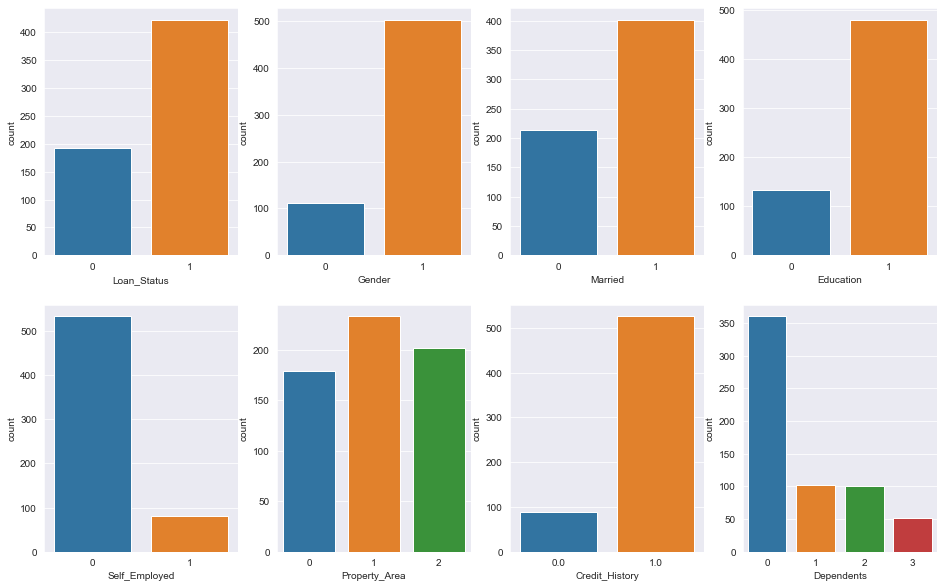

In [131]:
fig, ax = plt.subplots(2,4,figsize=(16,10))

sns.countplot('Loan_Status',data=loan_train,ax=ax[0][0])
sns.countplot('Gender',data=loan_train,ax=ax[0][1])
sns.countplot('Married',data=loan_train,ax=ax[0][2])
sns.countplot('Education',data=loan_train,ax=ax[0][3])
sns.countplot('Self_Employed',data=loan_train,ax=ax[1][0])
sns.countplot('Property_Area',data=loan_train,ax=ax[1][1])
sns.countplot('Credit_History',data=loan_train,ax=ax[1][2])
sns.countplot('Dependents',data=loan_train,ax=ax[1][3])

Bivariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

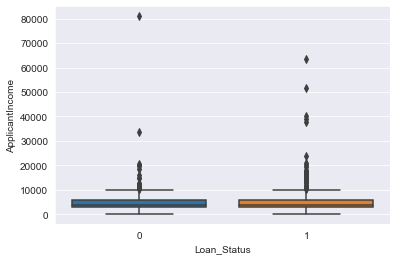

In [132]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=loan_train)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

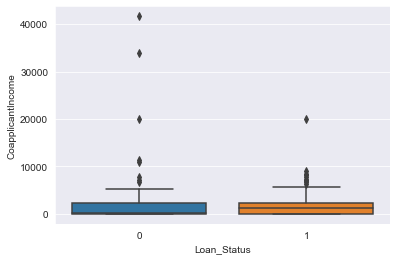

In [133]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=loan_train)

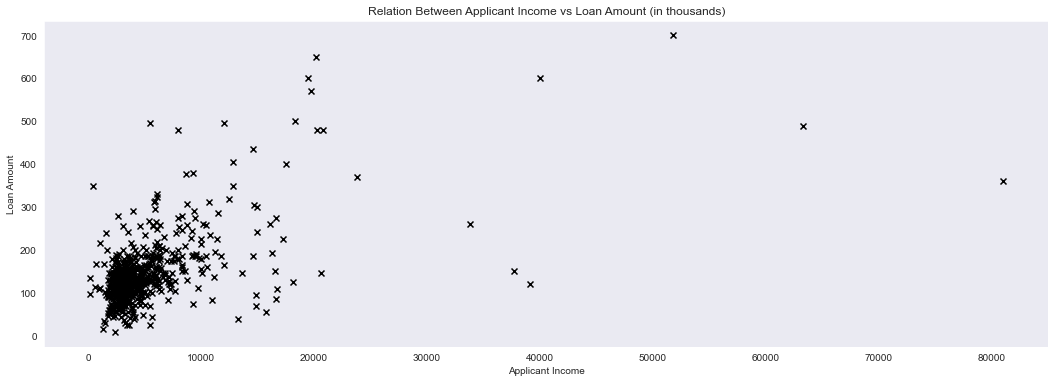

In [134]:


plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Loan Amount (in thousands)")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()



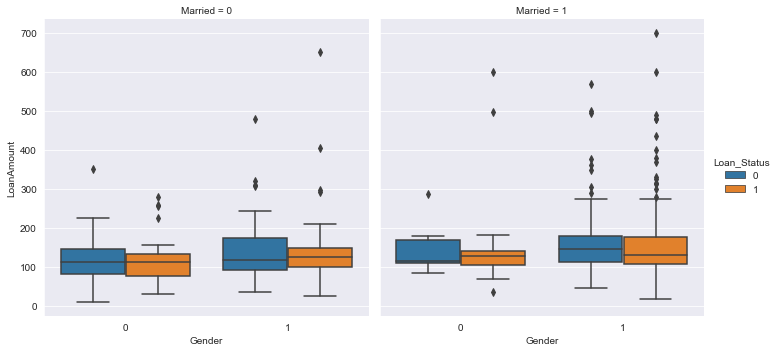

In [135]:
sns.catplot(x='Gender',y='LoanAmount',data=loan_train,kind='box',hue='Loan_Status',col='Married')

The loan amount is slightly higher for married than non-married.

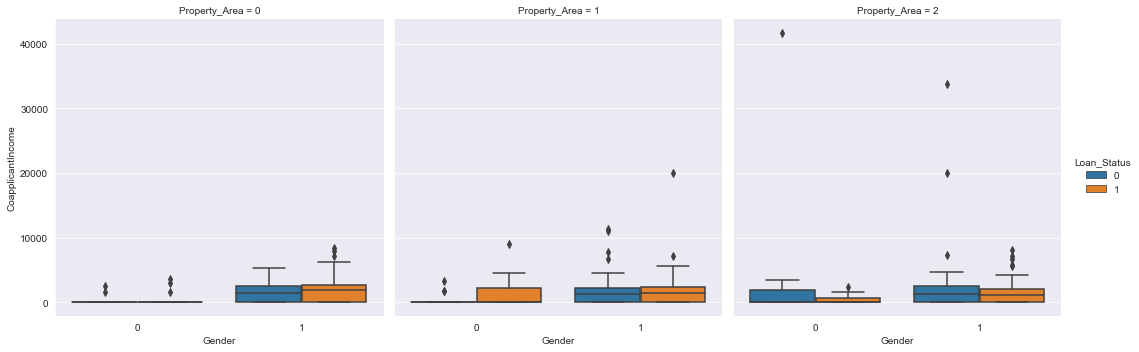

In [136]:
sns.catplot(x='Gender',y='CoapplicantIncome',data=loan_train,kind='box',hue='Loan_Status',col='Property_Area')

Male have higher Co-applicant income than females in all three property areas.

#### Correlation Matrix

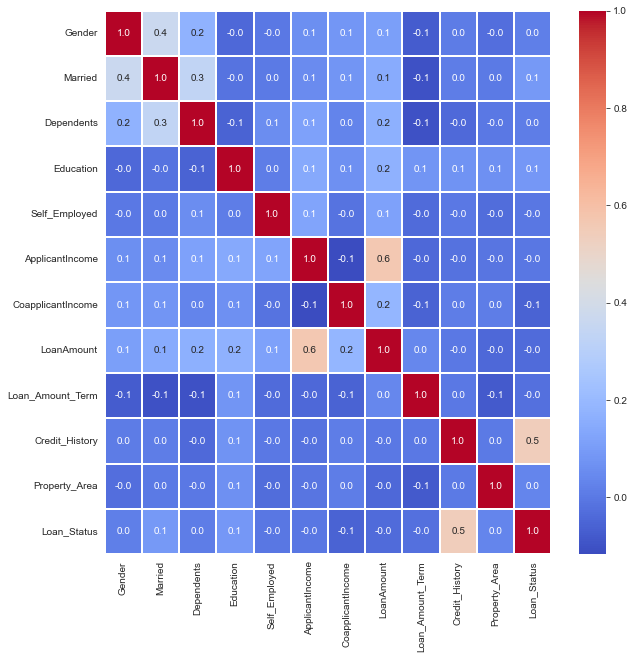

In [137]:
from filecmp import cmp


plt.figure(figsize=(10,10))
corr_matrix = loan_train.corr()

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.1f',linewidths=.1)
plt.show()

### Building Machine Learning Model

In [138]:
X = loan_train.drop(['Loan_ID','Loan_Status'],axis=1)
y = loan_train['Loan_Status']

In [139]:
from cgi import test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (491, 11)
X_test shape: (123, 11)
y_train shape: (491,)
y_test shape: (123,)


### Logistic Regression

In [140]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
77,1,1,1,1,1,1000,3022.0,110.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
306,0,0,0,1,0,3762,1666.0,135.0,360.0,1.0,0
446,1,1,2,0,0,4652,0.0,110.0,360.0,1.0,0
117,1,1,1,1,0,2214,1398.0,85.0,360.0,1.0,2


In [141]:
from random import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log_clf = LogisticRegression(random_state=0)
log_clf.fit(X_train,y_train)

y_pred = log_clf.predict(X_test)
accuracy_score(y_pred,y_test)

c:\Users\Saurab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8048780487804879

With *Logistic Rergression*, we get an accuracy score of 80%

<AxesSubplot:>

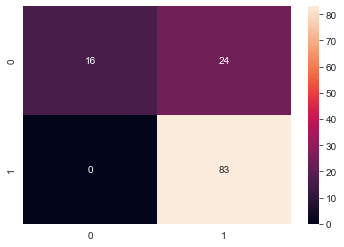

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)

### Random Forest Classfier

In [143]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [144]:
y_rf_pred = classifier.predict(X_test)
accuracy_score(y_test,y_rf_pred)

0.7723577235772358

<AxesSubplot:>

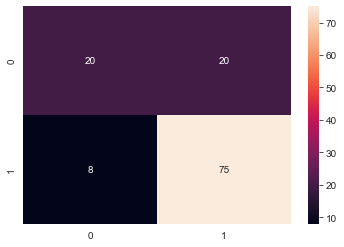

In [145]:
cm = confusion_matrix(y_test,y_rf_pred)

sns.heatmap(cm,annot=True)

### SVM

In [146]:
from sklearn import svm

svm_clss = svm.SVC(kernel='linear')
svm_clss.fit(X_train,y_train)

SVC(kernel='linear')

In [147]:
pred = svm_clss.predict(X_test)
accuracy_score(y_test,pred)


0.7886178861788617

<AxesSubplot:>

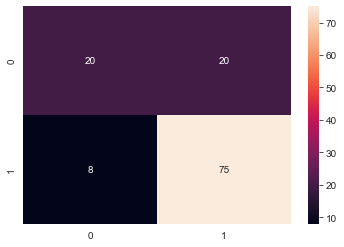

In [148]:
cm = confusion_matrix(y_test,y_rf_pred)

sns.heatmap(cm,annot=True)

### Conclusion
Among the different algorithms we have used, LogisticRegression seems to perfom better among LogisticRegression, SVM and RandomForest with an accuracy score of 80%.